In [13]:
import numpy as np
import math
import ikpy.chain
import ikpy.utils.plot as plot_utils

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


my_chain = ikpy.chain.Chain.from_urdf_file("/home/maven/robot_arm_ws/src/robot_arm_description/urdf/temp.urdf", active_links_mask=[False, True, True, True, True, True, True])




In [8]:
def rotation_matrix(theta1, theta2, theta3, order='yzy'):
        """
        input
            theta1, theta2, theta3 = rotation angles in rotation order (degrees)
            oreder = rotation order of x,y,z　e.g. XZY rotation -- 'xzy'
        output
            3x3 rotation matrix (numpy array)
        """
        c1 = np.cos(theta1 * np.pi / 180)
        s1 = np.sin(theta1 * np.pi / 180)
        c2 = np.cos(theta2 * np.pi / 180)
        s2 = np.sin(theta2 * np.pi / 180)
        c3 = np.cos(theta3 * np.pi / 180)
        s3 = np.sin(theta3 * np.pi / 180)

        if order == 'xzx':
            matrix=np.array([[c2, -c3*s2, s2*s3],
                             [c1*s2, c1*c2*c3-s1*s3, -c3*s1-c1*c2*s3],
                             [s1*s2, c1*s3+c2*c3*s1, c1*c3-c2*s1*s3]])
        elif order=='xyx':
            matrix=np.array([[c2, s2*s3, c3*s2],
                             [s1*s2, c1*c3-c2*s1*s3, -c1*s3-c2*c3*s1],
                             [-c1*s2, c3*s1+c1*c2*s3, c1*c2*c3-s1*s3]])
        elif order=='yxy':
            matrix=np.array([[c1*c3-c2*s1*s3, s1*s2, c1*s3+c2*c3*s1],
                             [s2*s3, c2, -c3*s2],
                             [-c3*s1-c1*c2*s3, c1*s2, c1*c2*c3-s1*s3]])
        elif order=='yzy':
            matrix=np.array([[c1*c2*c3-s1*s3, -c1*s2, c3*s1+c1*c2*s3],
                             [c3*s2, c2, s2*s3],
                             [-c1*s3-c2*c3*s1, s1*s2, c1*c3-c2*s1*s3]])
        elif order=='zyz':
            matrix=np.array([[c1*c2*c3-s1*s3, -c3*s1-c1*c2*s3, c1*s2],
                             [c1*s3+c2*c3*s1, c1*c3-c2*s1*s3, s1*s2],
                             [-c3*s2, s2*s3, c2]])
        elif order=='zxz':
            matrix=np.array([[c1*c3-c2*s1*s3, -c1*s3-c2*c3*s1, s1*s2],
                             [c3*s1+c1*c2*s3, c1*c2*c3-s1*s3, -c1*s2],
                             [s2*s3, c3*s2, c2]])
        elif order=='xyz':
            matrix=np.array([[c2*c3, -c2*s3, s2],
                             [c1*s3+c3*s1*s2, c1*c3-s1*s2*s3, -c2*s1],
                             [s1*s3-c1*c3*s2, c3*s1+c1*s2*s3, c1*c2]])
        elif order=='xzy':
            matrix=np.array([[c2*c3, -s2, c2*s3],
                             [s1*s3+c1*c3*s2, c1*c2, c1*s2*s3-c3*s1],
                             [c3*s1*s2-c1*s3, c2*s1, c1*c3+s1*s2*s3]])
        elif order=='yxz':
            matrix=np.array([[c1*c3+s1*s2*s3, c3*s1*s2-c1*s3, c2*s1],
                             [c2*s3, c2*c3, -s2],
                             [c1*s2*s3-c3*s1, c1*c3*s2+s1*s3, c1*c2]])
        elif order=='yzx':
            matrix=np.array([[c1*c2, s1*s3-c1*c3*s2, c3*s1+c1*s2*s3],
                             [s2, c2*c3, -c2*s3],
                             [-c2*s1, c1*s3+c3*s1*s2, c1*c3-s1*s2*s3]])
        elif order=='zyx':
            matrix=np.array([[c1*c2, c1*s2*s3-c3*s1, s1*s3+c1*c3*s2],
                             [c2*s1, c1*c3+s1*s2*s3, c3*s1*s2-c1*s3],
                             [-s2, c2*s3, c2*c3]])
        elif order=='zxy':
            matrix=np.array([[c1*c3-s1*s2*s3, -c2*s1, c1*s3+c3*s1*s2],
                             [c3*s1+c1*s2*s3, c1*c2, s1*s3-c1*c3*s2],
                             [-c2*s3, s2, c2*c3]])

        return matrix

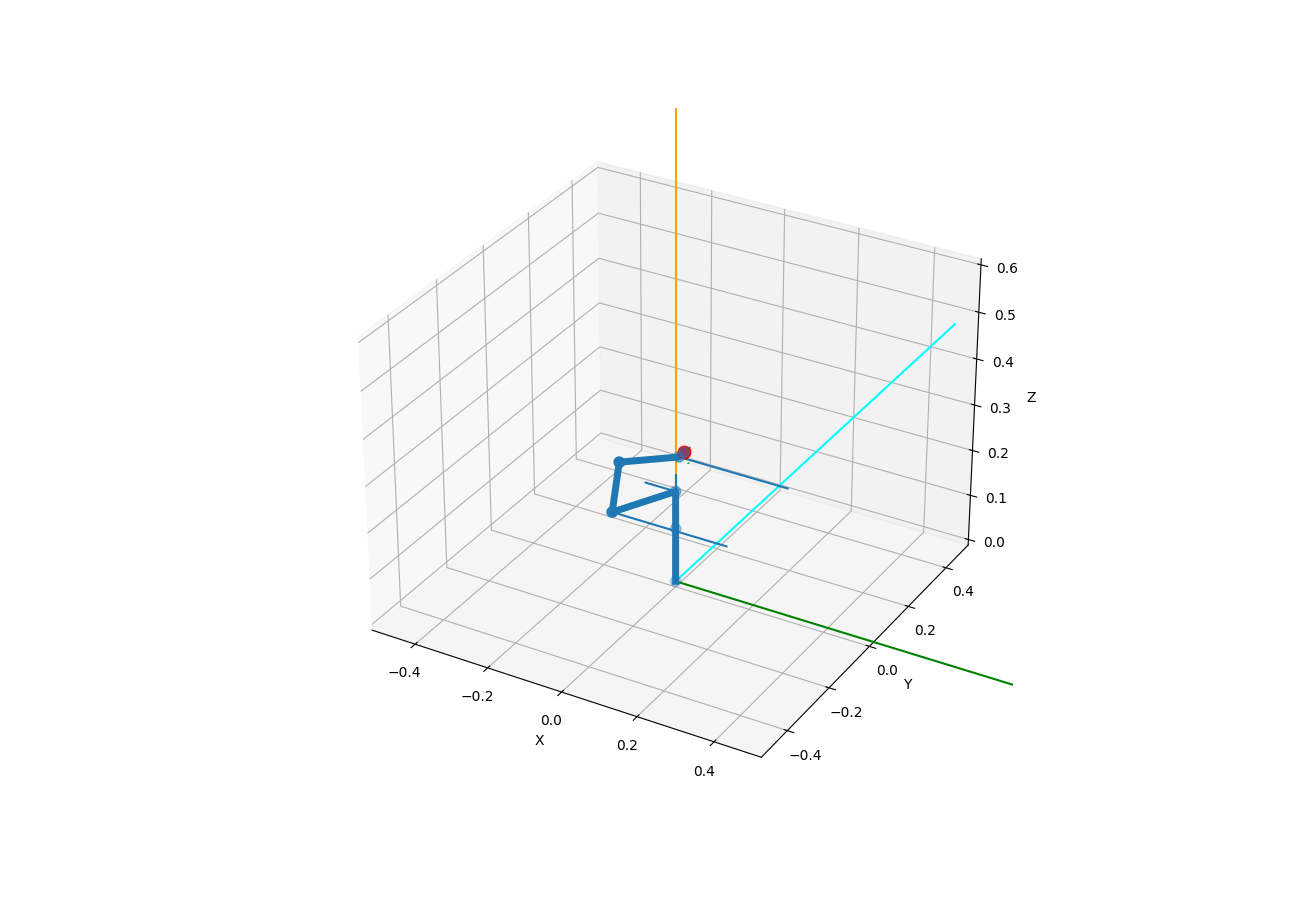

In [11]:
target_orientation = rotation_matrix(61.962, 0.0, 0.0, "yxz")
target_position = [0.0, 0.041, 0.268]
ik=my_chain.inverse_kinematics(target_position=target_position, target_orientation=target_orientation, orientation_mode="all")


fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)
fig.set_figwidth(13)
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0.0, 0.6)
plt.ion()